### extract_filament
will extract the filament from a the EAGLE simulation.

In [4]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u
from astropy.io import fits

import os
#import get_halpha_SB

%matplotlib inline

import get_halpha_SB


%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [5]:
machine = 'chinook'
plotchecks = True

Load the data

In [8]:
data_tuple_20 = loaddata(machine=machine,resolution=None,distance='50Mpc',slicewidth=20.)
data_tuple_5 = loaddata(machine=machine,resolution=None,distance='50Mpc',slicewidth=5.)

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_50Mpc_13arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_50Mpc_13arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,13.0357429643 appended.
Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 50Mpc is 13.0357429643.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_13arcsec_5slwd.npz does not exist, making it now...
Data exists, loading ./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 1.0.
DEBUGGING: data_tuple is: 
(array([[-3.52044058, -3.51675463, -

In [29]:
fulldata_5 = data_tuple_5[0]
fulldata_20 = data_tuple_20[0]

size_5 = fulldata_5.shape[0]
size_20 = fulldata_20.shape[0]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The type of size is <type 'float'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The type of size is <type 'float'>


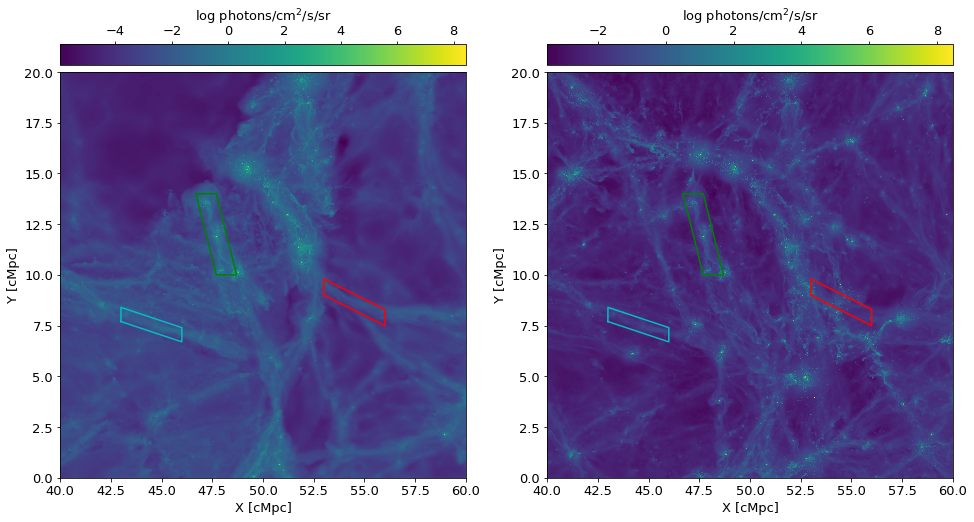

In [30]:
snapnum = 28

if plotchecks:
    xystarts = [40.,0.]
    size     = 20.
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (16., 16.))

    get_halpha_SB.makemap(fulldata_5[(40./100.*32000.):(60./100.*32000.),0:(20./100.*32000.)],size,ax1,xystarts = xystarts)
    get_halpha_SB.makemap(fulldata_20[(40./100.*32000.):(60./100.*32000.),0:(20./100.*32000.)],size,ax2,xystarts = xystarts)

if snapnum == 27:
    if plotchecks:
        # Pick out regions along the filaments in the map (snapnum 27)
        for ax in [ax1,ax2]:
            ax.plot([53,53,56,56,53],[9.2,10,8.5,7.7,9.2],color='r', label='Region 3')
            ax.plot(np.array([46.2,47.2,48.2,47.2,46.2]),[14,14,10,10,14],color='r', label='Region 1')
            ax.plot(np.array([43,43,46,46,43]),[7.5,8.2,7.2,6.5,7.5],color='r', label = 'Region 2')
    
    xbox_3 = np.array([53,53,56,56])*size_5/100.
    ybox_3 = np.array([9.2,10,8.5,7.7])*size_5/100.

    xbox_2 = np.array([43,43,46,46])*size_5/100.
    ybox_2 = (np.array([7.8,8.,7.1,6.8])-0.05)*size_5/100.

    xbox_1 = np.array([47.4,46.2,46.9,48.1])*size_5/100.
    ybox_1 = np.array([10.5,14,14,10.5])*size_5/100.
    
if snapnum == 28:
    if plotchecks:
        # Pick out regions along the filaments in the map (snapnum 28)
        for ax in [ax1,ax2]:
            ax.plot([53,53,56,56,53],np.array([9.2,10,8.5,7.7,9.2])-0.2,color='r', label='Region 3')
            ax.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='g', label='Region 1')
            ax.plot(np.array([43,43,46,46,43]),np.array([7.5,8.2,7.2,6.5,7.5])+0.2,color='c', label = 'Region 2')
    
    xbox_3 = np.array([53,53,56,56])*size_5/100.
    ybox_3 = (np.array([9.2,10,8.5,7.7])-0.2)*size_5/100.

    xbox_2 = np.array([43,43,46,46])*size_5/100.
    ybox_2 = (np.array([7.8,8.,7.1,6.8])-0.05+0.2)*size_5/100.

    xbox_1 = (np.array([47.4,46.2,46.9,48.1])+0.5)*size_5/100.
    ybox_1 = np.array([10.5,14,14,10.5])*size_5/100.

Pick out the data inside the Region 1 filament (green box in images above).

In [18]:
def extractdata(xfull,yfull,data):
    SBdata = np.zeros(xfull.shape)
    for i in range(yfull.shape[0]):
        for j in range(yfull.shape[1]):
                SBdata[i,j]  = data[xfull[i,j],yfull[i,j]]
    return SBdata

In [31]:
xbox = xbox_1
ybox = ybox_1
print('Region: '+str(xbox)+' , '+str(ybox))
    
xfull, yfull= get_halpha_SB.indices_region(xbox.astype(int),ybox.astype(int))

print xfull
SBdata_5 = extractdata(xfull,yfull,fulldata_5)
SBdata_20 = extractdata(xfull,yfull,fulldata_20)

Region: [ 15328.  14944.  15168.  15552.] , [ 3360.  4480.  4480.  3360.]
xacross_length,yacross_length,xdown_length,ydown_length:  224, 0, -384, 1120
xacross_length > yacross_length:
iterable: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0

In [37]:
def plotfilament(SBdata_5,ax=ax):
    clabel = r'log photons/cm$^2$/s/sr'; Vmin = None; Vmax= None
    fontsize=13
    ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
    ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
    
    ax.tick_params(labelsize=fontsize)
    colmap = 'viridis' #'afmhot'
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value

    img = ax.imshow(SBdata_5,origin='lower', cmap=cm.get_cmap(colmap), vmin = Vmin, vmax=Vmax,interpolation='nearest')

    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="15%",pad=0.1)
    cbar = plt.colorbar(img, cax=cax)
    cbar.solids.set_edgecolor("face")
    cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
    cbar.ax.tick_params(labelsize=fontsize)

Plotting the data that we've pulled out from the array as a check


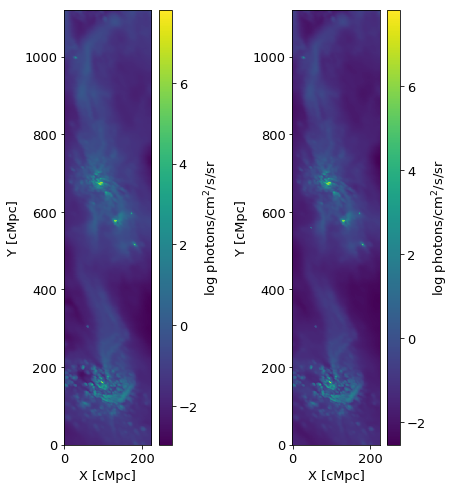

In [38]:
if plotchecks:
    print "Plotting the data that we've pulled out from the array as a check"
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7.5, 8.))
    plotfilament(SBdata_5,ax=ax1)
    plotfilament(SBdata_20,ax=ax2)
    
   # # Plot the original data around the region we pulled out to do a cross-check
   # #fig = plt.figure(figsize = (16.5, 15.))
   # ax1 = plt.subplot(422)
   # size = 4.0
   # xystarts = [45.2,10.]
   # get_halpha_SB.makemap(data_5[(45.2/100.*3200.):(49.2/100.*3200.),(10./100.*3200.):(14./100.*3200.)],size,ax1,xystarts = xystarts)
   # ax1.plot(np.append(xbox*100./3200.,xbox[0]*100./3200.),np.append(ybox*100./3200.,ybox[0]*100./3200.),color='r')
   # plt.show()


And then we could save the SB data here if we wanted.